In [1]:
!pip install tensorflow

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [113]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Input,Resizing,Rescaling,RandomFlip,RandomRotation,Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Model

In [7]:
Image_Size = 256
Batch_Size = 64

In [8]:
dataset = image_dataset_from_directory( "PlantVillage",shuffle=True,image_size=(Image_Size,Image_Size),batch_size=Batch_Size)

Found 16011 files belonging to 10 classes.


In [17]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [19]:
len(dataset)

251

In [21]:
251*64 ##(Total images  =  number of batches * batch_size)

16064

(64, 256, 256, 3)
(64,)
tf.Tensor(
[9 4 6 3 2 5 4 2 5 2 5 0 0 0 3 2 2 9 1 7 2 7 0 2 9 9 7 7 6 9 7 4 3 6 6 7 7
 8 2 9 2 9 4 0 4 0 0 4 2 7 4 4 2 0 4 9 0 7 5 3 9 4 5 4], shape=(64,), dtype=int32)


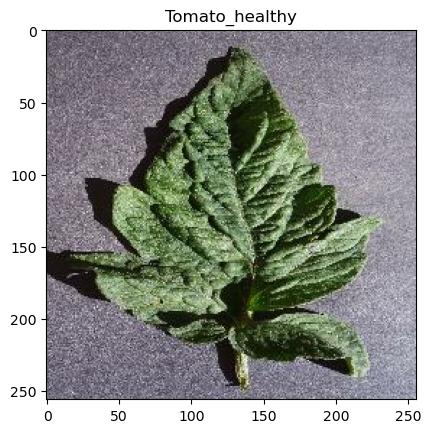

In [58]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.shape)
    print(label_batch)
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    

In [61]:
train_ds = dataset.take(int(len(dataset)*0.8))
len(train_ds)

200

In [65]:
val_ds = dataset.skip(int(len(dataset)*0.8)).take(int(len(dataset)*0.1))
len(val_ds)

25

In [66]:
test_ds = dataset.skip(int(len(dataset)*0.8)).skip(int(len(dataset)*0.1))
len(test_ds)

26

In [73]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [116]:
i = Input(shape=(256,256,3))
x = Resizing(256,256)(i)
x = Rescaling(1.0/256)(x)
##Data Agumentation
x = RandomFlip("horizontal_and_vertical")(x)
x = RandomRotation(0.2)(x)
x = Conv2D(32,(3,3),activation = "relu")(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64,(3,3),activation = "relu")(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64,(3,3),activation = "relu")(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64,(3,3),activation = "relu")(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64,(3,3),activation = "relu")(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(64,activation="relu")(x)
x = Dense(10,activation="softmax")(x)
model = Model(i,x) 
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)          │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing_28 (Resizing)               │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_26 (Rescaling)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_24 (RandomFlip)          │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_22 (RandomRotation)  │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_74 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_75 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_76 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_77 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_78 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 278,346 (1.06 MB)

 Trainable params: 278,346 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [118]:
model.compile(optimizer="adam",loss="SparseCategoricalCrossentropy",metrics=["accuracy"]) 

In [121]:
training = model.fit(train_ds,validation_data=val_ds,epochs=20)   

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 361s 2s/step - accuracy: 0.5973 - loss: 1.1671 - val_accuracy: 0.6682 - val_loss: 0.9675
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.7267 - loss: 0.7553 - val_accuracy: 0.5983 - val_loss: 1.4588
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 388s 2s/step - accuracy: 0.7962 - loss: 0.5775 - val_accuracy: 0.6804 - val_loss: 1.0199
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 331s 2s/step - accuracy: 0.8234 - loss: 0.4996 - val_accuracy: 0.7088 - val_loss: 1.0198
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 415s 2s/step - accuracy: 0.8576 - loss: 0.4116 - val_accuracy: 0.8401 - val_loss: 0.4706
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.8589 - loss: 0.4118 - val_accuracy: 0.7624 - val_loss: 0.8078
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 942s 5s/step - accuracy: 0.8862 - loss: 0.3323 - val_accuracy: 0.7912 - val_loss: 0.6655
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/step - accuracy: 0.8924 - loss: 0.3001 - val_accu

In [126]:
model.evaluate(test_ds)

200/200 ━━━━━━━━━━━━━━━━━━━━ 80s 399ms/step - accuracy: 0.9044 - loss: 0.2974


[0.31371599435806274, 0.901171863079071]

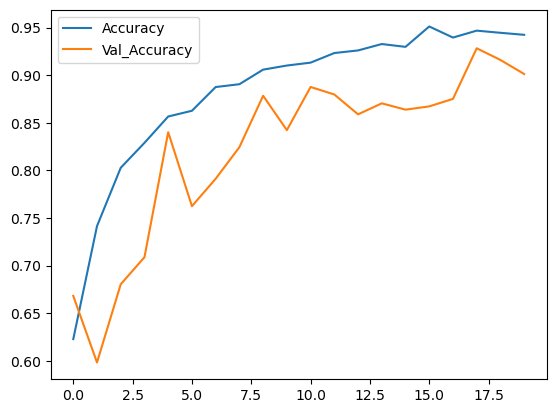

In [133]:
plt.plot(training.history["accuracy"],label="Accuracy")
plt.plot(training.history["val_accuracy"],label="Val_Accuracy")
plt.legend() 

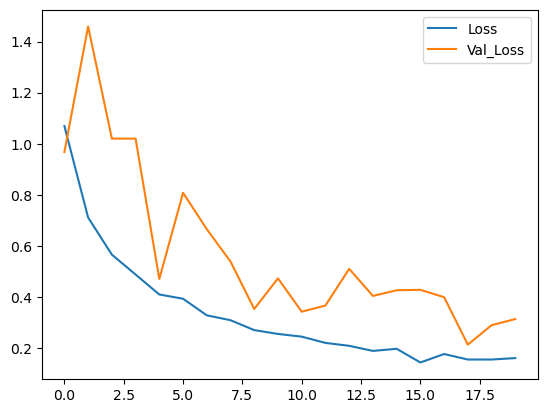

In [132]:
plt.plot(training.history["loss"],label="Loss")
plt.plot(training.history["val_loss"],label="Val_Loss")
plt.legend() 

Image to be predicted
Predicted image label Tomato_Early_blight
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Prediction by model [3.41788564e-06 8.83014917e-01 1.16655655e-01 2.29100692e-07
 2.10803606e-07 2.86083814e-05 1.83270276e-05 2.78570544e-04
 8.50162696e-09 3.18092115e-11]


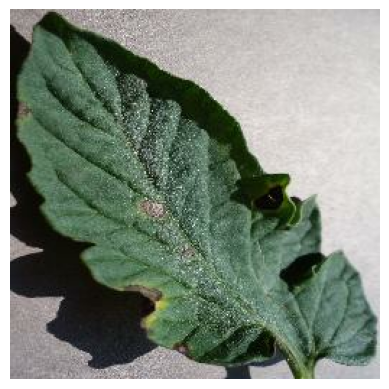

In [173]:
for image_batch,label_batch in test_ds.take(1):
    print("Image to be predicted")
    plt.imshow(image_batch[0].numpy().astype("uint8"))  
    plt.axis("off") 
    print("Predicted image label",class_names[label_batch[0]])
    batch_prediction = model.predict(image_batch)
    print("Prediction by model",batch_prediction[0]) 

Image to be predicted
Predicted image label Tomato_Spider_mites_Two_spotted_spider_mite
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Prediction by model Tomato_Spider_mites_Two_spotted_spider_mite


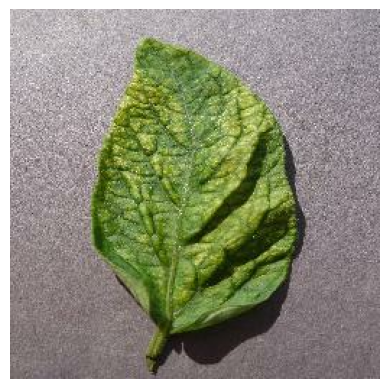

In [174]:
for image_batch,label_batch in test_ds.take(1):
    print("Image to be predicted")
    plt.imshow(image_batch[0].numpy().astype("uint8"))  
    plt.axis("off") 
    print("Predicted image label",class_names[label_batch[0]])
    batch_prediction = model.predict(image_batch)
    print("Prediction by model",class_names[np.argmax(batch_prediction[0])]) 